___
<a href='http://www.kgptalkie.com'><img src='../kgptalkie_strips.png'/></a>
___

<center><em>Copyright by KGPTalkie</em></center>
<center><em>For free ML tutorials, visit us at <a href='http://www.kgptalkie.com'>www.kgptalkie.com</a> and <a href='http://www.youtube.com/kgptalkie'>www.youtube.com/kgptalkie</a> </em></center>

# Spam Text Classification

- N-Gram, Bi-Gram etc
- Bag of Words (BoW)
- Term Frequency Calculation TF
- Inverse Document Frequency IDF
- TFIDF Term Frequency - Inverse Document Frequency
- Text Classification

### N-Gram 

##### please turn your page
- Unigram: `please | turn | your | page`
- Bigram: `please turn | turn your | your page`
- Trigram: `please turn your | turn your page`

You can think of an N-gram as the sequence of N words, by that notion, a 2-gram (or bigram) is a two-word sequence of words like “please turn”, “turn your”, or ”your page”, and a 3-gram (or trigram) is a three-word sequence of words like “please turn your”, or “turn your page”

### Bag of Words (BoW) 

The bag-of-words model is a simplifying representation used in natural language processing and information retrieval. 

`x = ['which book is this', 'this is book and this is math']`

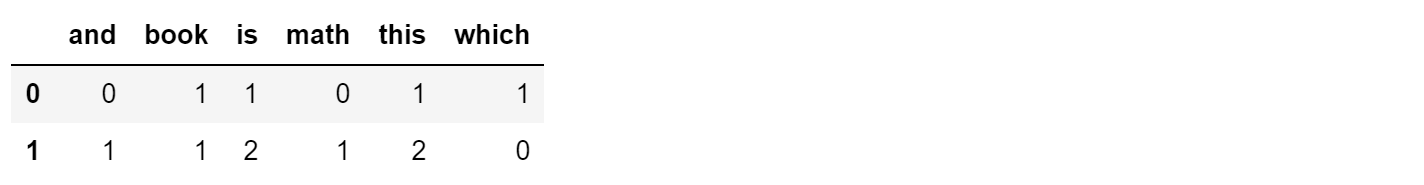

### Term Frequency (TF)

Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.



`x = ['which book is this', 'this is book and this is math']`

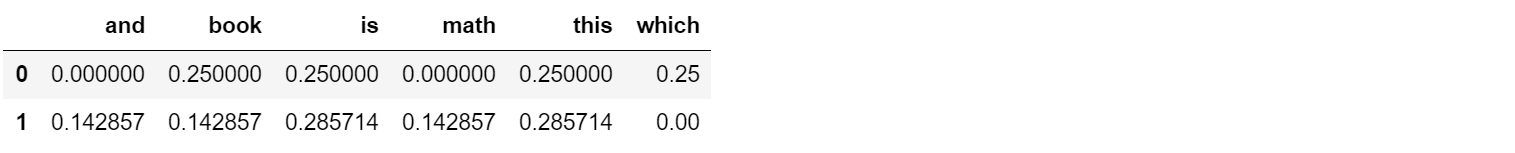

### Inverse Document Frequency IDF 

`idf = log( (1 + N)/(n + 1)) + 1 used in sklearn when smooth_idf = True`

where, N is the total number of rows and n is the number of rows in which the word was present.

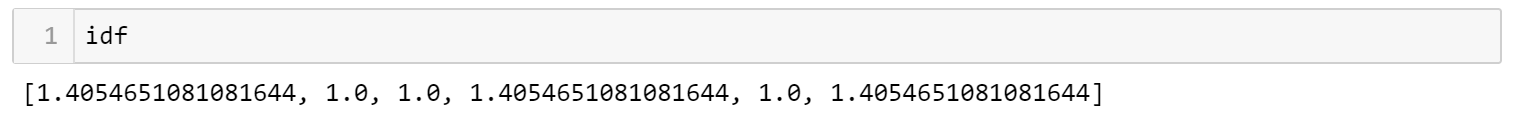

### TFIDF 

- Term Frequency: This summarizes how often a given word appears within a document.
- Inverse Document Frequency: This downscales words that appear a lot across documents.

`TF * IDF`

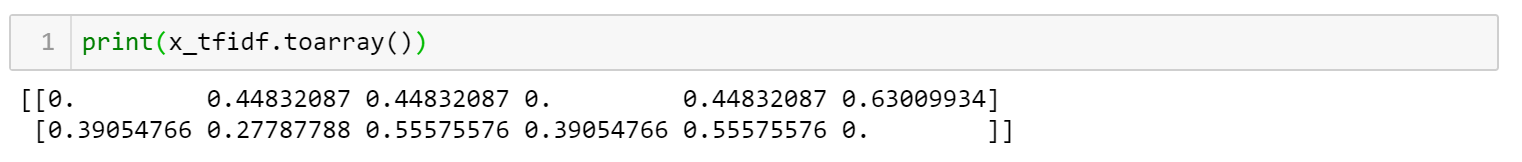

### Code Along 

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
import pandas as pd
import numpy as np

In [3]:
x = ['which book is this', 'this is book and this is math']

In [4]:
cv = CountVectorizer()
count = cv.fit_transform(x)

In [6]:
count.toarray() #BoW

array([[0, 1, 1, 0, 1, 1],
       [1, 1, 2, 1, 2, 0]], dtype=int64)

In [7]:
cv.get_feature_names()

['and', 'book', 'is', 'math', 'this', 'which']

In [12]:
bow = pd.DataFrame(count.toarray(), columns = cv.get_feature_names())

In [13]:
bow

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


### Term Frequency 

In [14]:
bow

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


In [15]:
bow.shape

(2, 6)

In [20]:
for index, row in enumerate(tf.iterrows()):
    print(row[1])
    print()

and      0.00
book     0.25
is       0.25
math     0.00
this     0.25
which    0.25
Name: 0, dtype: float64

and      0.142857
book     0.142857
is       0.285714
math     0.142857
this     0.285714
which    0.000000
Name: 1, dtype: float64



In [21]:
tf = bow.copy()
for index, row in enumerate(tf.iterrows()):
    for col in row[1].index:
        tf.loc[index, col] = tf.loc[index, col]/sum(row[1].values)

In [22]:
tf

,and,book,is,math,this,which
0,0.000000,0.250000,0.250000,0.000000,0.250000,0.25
1,0.142857,0.142857,0.285714,0.142857,0.285714,0.00


### Inverse Document Frequency IDF 

`idf = log( (1 + N)/(n + 1)) + 1 used in sklearn when smooth_idf = True`

where, N is the total number of rows and n is the number of rows in which the word was present.

In [23]:
bow

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


In [24]:
bb = bow.astype('bool')
bb

,and,book,is,math,this,which
0,False,True,True,False,True,True
1,True,True,True,True,True,False


In [26]:
bb['is'].sum()

2

In [27]:
cols = bb.columns
cols

Index(['and', 'book', 'is', 'math', 'this', 'which'], dtype='object')

In [29]:
nz = []
for col in cols:
    nz.append(bb[col].sum())
nz

[1, 2, 2, 1, 2, 1]

In [30]:
N = 2
idf = []
for index, col in enumerate(cols):
    idf.append(np.log((N + 1)/(nz[index] + 1)) + 1)

In [31]:
idf

[1.4054651081081644, 1.0, 1.0, 1.4054651081081644, 1.0, 1.4054651081081644]

In [32]:
x

['which book is this', 'this is book and this is math']

### TFIDF `TF * IDF` 

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
x

['which book is this', 'this is book and this is math']

In [35]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(x)

In [39]:
print(X.toarray())

[[0.         0.44832087 0.44832087 0.         0.44832087 0.63009934]
 [0.39054766 0.27787788 0.55575576 0.39054766 0.55575576 0.        ]]


In [40]:
idf

[1.4054651081081644, 1.0, 1.0, 1.4054651081081644, 1.0, 1.4054651081081644]

In [42]:
print(tfidf.idf_)

[1.40546511 1.         1.         1.40546511 1.         1.40546511]


### Load Spam Dataset

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
df = pd.read_csv('spam.tsv', sep = '\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [45]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [46]:
df.shape

(5572, 4)

In [47]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### Balance Dataset

In [48]:
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [49]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [51]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [52]:
ham = ham.sample(spam.shape[0])

In [53]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [54]:
data = ham.append(spam, ignore_index=True)

In [55]:
data.sample(5)

,label,message,length,punct
1026,spam,Free tones Hope you enjoyed your new content. ...,129,5
458,ham,"Oh yes, why is it like torture watching england?",48,2
1068,spam,Moby Pub Quiz.Win a £100 High Street prize if ...,160,4
674,ham,Got it..mail panren paru..,26,4
285,ham,"THATS ALRITE GIRL, U KNOW GAIL IS NEVA WRONG!...",102,5


In [56]:
data.shape

(1494, 4)

In [57]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

### Exploratory Data Analysis 

Data Visualization Course
https://bit.ly/udemy95off_kgptalkie 

What you will learn in this course

✔✔ Learn complete Exploratory Data Analysis on latest Covid-19 Dataset

✔✔ Learn EDA on Kaggle's Boston Housing and Titanic Datasets

✔✔ Complete EDA on IPL Cricket Matches, FIFA World Cup Matches, and Text Data

✔✔ And so much more

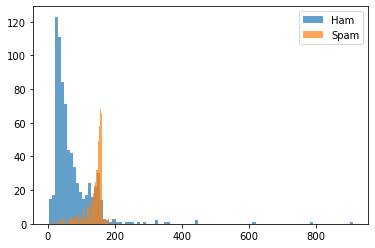

In [62]:
plt.hist(ham['length'], bins = 100, alpha = 0.7, label='Ham')
plt.hist(spam['length'], bins = 100, alpha = 0.7, label = 'Spam')
plt.legend()
plt.show()

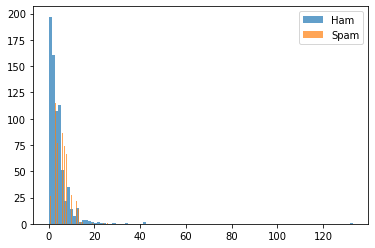

In [63]:
plt.hist(ham['punct'], bins = 100, alpha = 0.7, label='Ham')
plt.hist(spam['punct'], bins = 100, alpha = 0.7, label = 'Spam')
plt.legend()
plt.show()

### Data Preparation for Training

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
data.head()

,label,message,length,punct
0,ham,Buzzzz! *grins* Did I buzz your ass? Buzz your...,147,9
1,ham,Hmm .. Bits and pieces lol ... *sighs* ...,42,10
2,ham,Hey so whats the plan this sat?,32,1
3,ham,Sure! I am driving but will reach my destinati...,54,2
4,ham,Ok thanx... Take care then...,29,6


In [67]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['message'])

In [68]:
X = X.toarray()

In [69]:
X.shape

(1494, 4510)

In [70]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size = 0.2, random_state = 0, stratify = data['label'])

In [73]:
X_train.shape, X_test.shape

((1195, 4510), (299, 4510))

### Training Your First Text Classifier 

In [74]:
clf = RandomForestClassifier(n_estimators=100, n_jobs= -1)

In [75]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [76]:
y_pred = clf.predict(X_test)

In [77]:
confusion_matrix(y_test, y_pred)

array([[147,   3],
       [ 17, 132]], dtype=int64)

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.98      0.94       150
        spam       0.98      0.89      0.93       149

    accuracy                           0.93       299
   macro avg       0.94      0.93      0.93       299
weighted avg       0.94      0.93      0.93       299



### SVM 

C: copy, V: paste

In [84]:
clf = SVC(C = 1000, gamma = 'auto')

In [85]:
clf.fit(X_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [86]:
y_pred = clf.predict(X_test)

In [87]:
confusion_matrix(y_test, y_pred)

array([[150,   0],
       [ 17, 132]], dtype=int64)

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       150
        spam       1.00      0.89      0.94       149

    accuracy                           0.94       299
   macro avg       0.95      0.94      0.94       299
weighted avg       0.95      0.94      0.94       299



### Test Model with Real Data 

In [94]:
clf

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [97]:
def predict(x):
    x = tfidf.transform([x])
    x = x.toarray()
    pred = clf.predict(x)
    return pred

In [98]:
predict('hey, whassup')

array(['ham'], dtype=object)

In [99]:
predict('you have got free tickets to the usa this summer')

array(['spam'], dtype=object)

# Other Resources
|  ML Course | Description |
|:---|:---|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like Flask, Streamlit, and NGINX. |
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |
